# Modelo Preditivo

## Importando Bibliotecas e Configurando Ambiente de Trabalho

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    accuracy_score,
)
from sklearn.model_selection import cross_val_score

pd.set_option("display.max_columns", 29)
pd.set_option("display.max_rows", 100)
pd.set_option("display.float_format", lambda x: "%.2f" % x)
import warnings

warnings.simplefilter(action="ignore")

%load_ext nb_black

<IPython.core.display.Javascript object>

## Carregando os Dados

In [2]:
df = pd.read_csv("cars_train.csv", encoding="utf-16", sep="\t")
df.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.00,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.00,67772.00,CVT,4,Sedã,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.59
1,279639842134129588306469566150288644214,8.00,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.00,62979.00,Automática,4,Sedã,N,Branco,PF,Belo Horizonte,Minas Gerais (MG),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.33
2,56414460810621048900295678236538171981,16.00,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.00,44070.00,Automática,4,Sedã,N,Preto,PJ,Santos,São Paulo (SP),Loja,True,False,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.81
3,56862509826849933428086372390159405545,14.00,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.00,85357.00,Automática,4,Picape,N,Branco,PJ,Sorocaba,São Paulo (SP),Loja,True,True,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.36
4,338980975753200343894519909855598027197,8.00,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.00,71491.00,Automática,4,Utilitário esportivo,N,Preto,PF,Rio de Janeiro,Rio de Janeiro (RJ),Pessoa Física,False,False,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.76


<IPython.core.display.Javascript object>

## Explorando os Dados

In [3]:
df.shape

(29584, 29)

<IPython.core.display.Javascript object>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

<IPython.core.display.Javascript object>

In [5]:
# Verificando os valores missing
df.isnull().sum().sort_values(ascending=False)

veiculo_alienado           29584
garantia_de_fábrica        25219
revisoes_dentro_agenda     23674
revisoes_concessionaria    20412
veiculo_único_dono         19161
veiculo_licenciado         13678
ipva_pago                   9925
dono_aceita_troca           7662
num_fotos                    177
id                             0
estado_vendedor                0
elegivel_revisao               0
troca                          0
entrega_delivery               0
anunciante                     0
cidade_vendedor                0
tipo_vendedor                  0
cor                            0
blindado                       0
tipo                           0
num_portas                     0
cambio                         0
hodometro                      0
ano_modelo                     0
ano_de_fabricacao              0
versao                         0
modelo                         0
marca                          0
preco                          0
dtype: int64

<IPython.core.display.Javascript object>

In [6]:
# Verificando os valores missing em porcentagem
df.isnull().sum() / df.shape[0] * 100

id                          0.00
num_fotos                   0.60
marca                       0.00
modelo                      0.00
versao                      0.00
ano_de_fabricacao           0.00
ano_modelo                  0.00
hodometro                   0.00
cambio                      0.00
num_portas                  0.00
tipo                        0.00
blindado                    0.00
cor                         0.00
tipo_vendedor               0.00
cidade_vendedor             0.00
estado_vendedor             0.00
anunciante                  0.00
entrega_delivery            0.00
troca                       0.00
elegivel_revisao            0.00
dono_aceita_troca          25.90
veiculo_único_dono         64.77
revisoes_concessionaria    69.00
ipva_pago                  33.55
veiculo_licenciado         46.23
garantia_de_fábrica        85.25
revisoes_dentro_agenda     80.02
veiculo_alienado          100.00
preco                       0.00
dtype: float64

<IPython.core.display.Javascript object>

## Separando o Dataset em Treino e Teste

In [7]:
# Coletando as variáveis X e y
X = df.iloc[:, :-1]
y = df["preco"].values

# Aplicando o split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

<IPython.core.display.Javascript object>

In [8]:
# Atribuindo X_train e y_train a novas variáveis, preservando as originais
df_Xtrain = X_train
df_ytrain = y_train

<IPython.core.display.Javascript object>

### Tratando Valores Missing 

#### Excluindo variáveis com mais de 50% de valores missing

Como as variáveis "veiculo_único_dono", "revisoes_concessionaria", "garantia_de_fábrica", "revisoes_dentro_agenda" e "veiculo_alienado" possuem mais de 50% dos dados missing, vamos excluir estas variáveis do nosso dataset. 

Também será excluída a variável "elegivel_revisao", pois todos os seus valores são False, não gerando qualquer impacto no nosso modelo preditivo.

In [9]:
# Excluindo as variáveis com mais de 50% dos dados missing do nosso dataset
excluded_variables = [
    "veiculo_único_dono",
    "revisoes_concessionaria",
    "garantia_de_fábrica",
    "revisoes_dentro_agenda",
    "veiculo_alienado",
    "elegivel_revisao",
]

df_Xtrain = df_Xtrain.drop(excluded_variables, axis=1)
df_Xtrain.shape

(20708, 22)

<IPython.core.display.Javascript object>

#### Tratando variáveis com menos de 50% de valores missing 

As demais variáveis que possuem valroes missing abaixo de 50%, vamos analisar cada uma separadamente para compreender a melhor forma de tratar estes dados. 

#### Variável num_fotos

In [10]:
# Analisando o resumo estatístico da variável
df_Xtrain["num_fotos"].describe()

count   20580.00
mean       10.34
std         3.50
min         8.00
25%         8.00
50%         8.00
75%        14.00
max        21.00
Name: num_fotos, dtype: float64

<IPython.core.display.Javascript object>

In [11]:
# Analisando a moda da variável "num_fotos" em porcentagem
df_Xtrain["num_fotos"].value_counts(normalize=True)

8.00    0.66
15.00   0.09
16.00   0.08
14.00   0.06
17.00   0.03
13.00   0.03
9.00    0.03
20.00   0.01
18.00   0.01
12.00   0.00
19.00   0.00
11.00   0.00
10.00   0.00
21.00   0.00
Name: num_fotos, dtype: float64

<IPython.core.display.Javascript object>

Com base nas análises, temos o valor 8 como mediana e também como moda (sendo que 66% dos registros possuem este valor). Por isso, vamos preenher os registros missing com este mesmo valor.

In [12]:
# Imputando valor 8 para os registros missing da variável num_fotos
df_Xtrain["num_fotos"] = df_Xtrain["num_fotos"].fillna(8)
df_Xtrain["num_fotos"].isnull().sum()

0

<IPython.core.display.Javascript object>

#### Variável dono_aceita_troca

In [13]:
# Analisando a variável
df_Xtrain["dono_aceita_troca"].describe()

count            15357
unique               1
top       Aceita troca
freq             15357
Name: dono_aceita_troca, dtype: object

<IPython.core.display.Javascript object>

Como nesta variável temos apenas um valor além dos valores missing, que é o valor "Aceita_troca", e tendo conhecimento de negócio que muitas vezes os proprietários desejam vender seus veículos sem querer envolver qualquer tipo de troca, concluo que os valores missing podem ser preenchidos com o valor negativo, ou seja, "Nao_aceita_troca".

In [14]:
# Aplicando a função fillna para inputar os valores nos dados missing
df_Xtrain["dono_aceita_troca"] = df_Xtrain["dono_aceita_troca"].fillna(
    "Nao_aceita_troca"
)
df_Xtrain["dono_aceita_troca"].isnull().sum()

0

<IPython.core.display.Javascript object>

#### Variável ipva_pago

In [15]:
# Analisando a variável
df_Xtrain["ipva_pago"].describe()

count         13843
unique            1
top       IPVA pago
freq          13843
Name: ipva_pago, dtype: object

<IPython.core.display.Javascript object>

Assim como na variável anterior, aqui só temos um valor além dos valores missing, que é "IPVA_pago". Compreendendo que o IPVA é um tributo  estadual, e por isso sua cobrança varia de estado para estado, é natural que dependendo do mês em que o dataset foi gerado, muitos vaículos ainda não tenham tido seu IPVA pago, por isso os valores missings serão preenchidos com "IPVA_nao_pago"

In [16]:
# Aplicando a função fillna para inputar os valores nos dados missing
df_Xtrain["ipva_pago"] = df_Xtrain["ipva_pago"].fillna("Ipva_nao_pago")
df_Xtrain["ipva_pago"].isnull().sum()

0

<IPython.core.display.Javascript object>

#### Variável Veículo Licenciado

In [17]:
# Analisando a variável "veiculo_licenciado"
df_Xtrain["veiculo_licenciado"].describe()

count          11190
unique             1
top       Licenciado
freq           11190
Name: veiculo_licenciado, dtype: object

<IPython.core.display.Javascript object>

Como no caso do ipva, o licenciamento também possui uma legislação de pagamento estadual, variando de estado para estado a política de pagameto. Como é natural que tenhamos no dataset veículos que ainda não tiveram suas licenças pagas, vamos inputar para os dados missing o registro "Nao_licenciado".

In [18]:
# Aplicando a função fillna para inputar os valores nos dados missing
df_Xtrain["veiculo_licenciado"] = df_Xtrain["veiculo_licenciado"].fillna(
    "Nao_licenciado"
)
df_Xtrain["veiculo_licenciado"].isnull().sum()

0

<IPython.core.display.Javascript object>

In [19]:
# Verificando o dataset depois das alterações
df_Xtrain

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,dono_aceita_troca,ipva_pago,veiculo_licenciado
6491,299077538518603649109687064851921330645,8.00,VOLKSWAGEN,JETTA,1.4 250 TSI TOTAL FLEX TIPTRONIC,2018,2019.00,34983.00,Automática,4,Sedã,N,Branco,PF,Salto,São Paulo (SP),Pessoa Física,False,False,Nao_aceita_troca,IPVA pago,Licenciado
4714,41989346655541551886842860851170732285,8.00,AUDI,Q3,2.0 TFSI AMBIENTE QUATTRO 4P GASOLINA S TRONIC,2017,2017.00,78013.00,Automática,4,Sedã,N,Branco,PF,Fortaleza,Santa Catarina (SC),Pessoa Física,False,False,Aceita troca,IPVA pago,Nao_licenciado
18726,183310560178138572797009535615004277549,8.00,FIAT,TORO,1.8 16V EVO FLEX FREEDOM OPEN EDITION AT6,2018,2018.00,40838.00,CVT,4,Hatchback,N,Preto,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,Nao_aceita_troca,IPVA pago,Licenciado
21010,131003382321288955178704954269250285352,8.00,HONDA,CIVIC,2.0 16V FLEXONE EXL 4P CVT,2019,2019.00,26148.00,CVT,4,Sedã,N,Branco,PF,São Paulo,São Paulo (SP),Pessoa Física,False,False,Aceita troca,Ipva_nao_pago,Nao_licenciado
24333,87318531247951560199084841162296576918,15.00,VOLKSWAGEN,GOLF,1.4 TSI HIGHLINE 16V TOTAL FLEX 4P TIPTRONIC,2017,2017.00,90990.00,Automática,4,Picape,N,Branco,PJ,São Paulo,São Paulo (SP),Loja,False,False,Aceita troca,Ipva_nao_pago,Nao_licenciado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,9970401356964341669563786944371690821,8.00,LAND ROVER,DISCOVERY SPORT,2.0 16V TD4 TURBO DIESEL SE 4P AUTOMÁTICO,2017,2018.00,75541.00,Automática,4,Sedã,N,Branco,PF,Porto Alegre,Rio Grande do Sul (RS),Pessoa Física,False,False,Aceita troca,IPVA pago,Nao_licenciado
5390,170851601454473644910673357720050794474,8.00,MITSUBISHI,ASX,2.0 4X2 16V GASOLINA 4P AUTOMÁTICO,2015,2016.00,52761.00,CVT,4,Sedã,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,Nao_aceita_troca,IPVA pago,Licenciado
860,338560291081815208366760894054900201923,8.00,RENAULT,DUSTER,2.0 TECH ROAD II 4X2 16V FLEX 4P AUTOMÁTICO,2013,2014.00,99360.00,Automática,4,Sedã,N,Preto,PF,Guarulhos,São Paulo (SP),Pessoa Física,False,False,Nao_aceita_troca,IPVA pago,Licenciado
15795,65784629688549241909515301838909604995,8.00,JEEP,COMPASS,2.0 16V DIESEL TRAILHAWK 4X4 AUTOMÁTICO,2018,2018.00,38928.00,Automática,4,Utilitário esportivo,N,Preto,PF,Ribeirão Preto,São Paulo (SP),Pessoa Física,False,False,Nao_aceita_troca,IPVA pago,Licenciado


<IPython.core.display.Javascript object>

In [20]:
# Confirmando que não existe mais valores missing no dataset
df_Xtrain.isnull().sum().sum()

0

<IPython.core.display.Javascript object>

### Tratando Variáveis Categóricas

Como utilizaremos uma Regressão Linear Múltipla para a construção do nosso modelo, as variáveis que iremos incluir no modelo precisam estar na forma numérica.

Para isso, utilizaremos diferentes técnicas de acordo com a necessidade de cada variável. 

In [21]:
# Analisando as variáveis categóricas
df_Xtrain.select_dtypes(include=["object"]).columns

Index(['id', 'marca', 'modelo', 'versao', 'cambio', 'tipo', 'blindado', 'cor',
       'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor', 'anunciante',
       'dono_aceita_troca', 'ipva_pago', 'veiculo_licenciado'],
      dtype='object')

<IPython.core.display.Javascript object>

#### Tratando variáveis categóricas binárias com get_dummies

In [22]:
df_Xtrain = pd.get_dummies(
    df_Xtrain,
    columns=[
        "blindado",
        "entrega_delivery",
        "troca",
        "tipo_vendedor",
        "dono_aceita_troca",
        "ipva_pago",
        "veiculo_licenciado",
    ],
    drop_first=True,
)

<IPython.core.display.Javascript object>

In [23]:
df_Xtrain

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,cor,cidade_vendedor,estado_vendedor,anunciante,blindado_S,entrega_delivery_True,troca_True,tipo_vendedor_PJ,dono_aceita_troca_Nao_aceita_troca,ipva_pago_Ipva_nao_pago,veiculo_licenciado_Nao_licenciado
6491,299077538518603649109687064851921330645,8.00,VOLKSWAGEN,JETTA,1.4 250 TSI TOTAL FLEX TIPTRONIC,2018,2019.00,34983.00,Automática,4,Sedã,Branco,Salto,São Paulo (SP),Pessoa Física,0,0,0,0,1,0,0
4714,41989346655541551886842860851170732285,8.00,AUDI,Q3,2.0 TFSI AMBIENTE QUATTRO 4P GASOLINA S TRONIC,2017,2017.00,78013.00,Automática,4,Sedã,Branco,Fortaleza,Santa Catarina (SC),Pessoa Física,0,0,0,0,0,0,1
18726,183310560178138572797009535615004277549,8.00,FIAT,TORO,1.8 16V EVO FLEX FREEDOM OPEN EDITION AT6,2018,2018.00,40838.00,CVT,4,Hatchback,Preto,São Paulo,São Paulo (SP),Pessoa Física,0,0,0,0,1,0,0
21010,131003382321288955178704954269250285352,8.00,HONDA,CIVIC,2.0 16V FLEXONE EXL 4P CVT,2019,2019.00,26148.00,CVT,4,Sedã,Branco,São Paulo,São Paulo (SP),Pessoa Física,0,0,0,0,0,1,1
24333,87318531247951560199084841162296576918,15.00,VOLKSWAGEN,GOLF,1.4 TSI HIGHLINE 16V TOTAL FLEX 4P TIPTRONIC,2017,2017.00,90990.00,Automática,4,Picape,Branco,São Paulo,São Paulo (SP),Loja,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,9970401356964341669563786944371690821,8.00,LAND ROVER,DISCOVERY SPORT,2.0 16V TD4 TURBO DIESEL SE 4P AUTOMÁTICO,2017,2018.00,75541.00,Automática,4,Sedã,Branco,Porto Alegre,Rio Grande do Sul (RS),Pessoa Física,0,0,0,0,0,0,1
5390,170851601454473644910673357720050794474,8.00,MITSUBISHI,ASX,2.0 4X2 16V GASOLINA 4P AUTOMÁTICO,2015,2016.00,52761.00,CVT,4,Sedã,Branco,Rio de Janeiro,São Paulo (SP),Pessoa Física,0,0,0,0,1,0,0
860,338560291081815208366760894054900201923,8.00,RENAULT,DUSTER,2.0 TECH ROAD II 4X2 16V FLEX 4P AUTOMÁTICO,2013,2014.00,99360.00,Automática,4,Sedã,Preto,Guarulhos,São Paulo (SP),Pessoa Física,0,0,0,0,1,0,0
15795,65784629688549241909515301838909604995,8.00,JEEP,COMPASS,2.0 16V DIESEL TRAILHAWK 4X4 AUTOMÁTICO,2018,2018.00,38928.00,Automática,4,Utilitário esportivo,Preto,Ribeirão Preto,São Paulo (SP),Pessoa Física,0,0,0,0,1,0,0


<IPython.core.display.Javascript object>

In [24]:
# Analisando as variáveis categóricas após o tratamento das variáveis binárias
df_Xtrain.select_dtypes(include=["object"]).columns

Index(['id', 'marca', 'modelo', 'versao', 'cambio', 'tipo', 'cor',
       'cidade_vendedor', 'estado_vendedor', 'anunciante'],
      dtype='object')

<IPython.core.display.Javascript object>

#### Tratando a variável categórica marca

In [25]:
# Verificando os valores únicos que possui a variável
df_Xtrain["marca"].unique()

array(['VOLKSWAGEN', 'AUDI', 'FIAT', 'HONDA', 'HYUNDAI', 'NISSAN', 'BMW',
       'TOYOTA', 'PORSCHE', 'CHEVROLET', 'JEEP', 'MERCEDES-BENZ',
       'PEUGEOT', 'RENAULT', 'TROLLER', 'KIA', 'FORD', 'MITSUBISHI',
       'CITROËN', 'MINI', 'VOLVO', 'CHRYSLER', 'LAND ROVER', 'JAGUAR',
       'CHERY', 'DODGE', 'RAM', 'LEXUS', 'EFFA', 'SUZUKI', 'FERRARI',
       'MASERATI', 'SSANGYONG', 'SUBARU', 'LIFAN', 'SMART', 'JAC', 'BRM',
       'ALFA ROMEO'], dtype=object)

<IPython.core.display.Javascript object>

In [26]:
# Verificando o número de valores únicos que possui a variável
len(df_Xtrain["marca"].unique())

39

<IPython.core.display.Javascript object>

Como se trata de 39 valores diferentes, vamos dividir os registros em 4 grupos diferentes de acordo com o continente de cada marca.

O critério utilizado é o continente onde a marca é gerida atualmente, e não onde ela foi fudada. A Chrysler, por exemplo, foi fundada nos Estados Unidos, mas hoje é administrada por um um grupo europeu, então ela estará na lista de marcas da Europa.

In [27]:
# Criando as listas para cada continente com suas respectivas marcas
marcas_europa = [
    "VOLKSWAGEN",
    "AUDI",
    "FIAT",
    "BMW",
    "PORSCHE",
    "JEEP",
    "MERCEDES-BENZ",
    "PEUGEOT",
    "RENAULT",
    "CITROËN",
    "MINI",
    "VOLVO",
    "CHRYSLER",
    "LAND ROVER",
    "JAGUAR",
    "DODGE",
    "RAM",
    "FERRARI",
    "MASERATI",
    "SMART",
    "ROMEO",
]
marcas_america_norte = ["CHEVROLET", "TROLLER", "FORD"]
marcas_asiaticas = [
    "HONDA",
    "HYUNDAI",
    "NISSAN",
    "TOYOTA",
    "KIA",
    "MITSUBISHI",
    "CHERY",
    "LEXUS",
    "SUZUKI",
    "SSANGYONG",
    "SUBARU",
    "LIFAN",
    "JAC",
]
marcas_america_sul = ["EFFA", "BRM"]

len(marcas_europa + marcas_america_norte + marcas_asiaticas + marcas_america_sul)

39

<IPython.core.display.Javascript object>

In [28]:
# Criando as colunas e atribuindo o valor 1 de acordo com a marca em cada registro
df_Xtrain.loc[df_Xtrain["marca"].isin(marcas_europa), "marca_europa"] = 1
df_Xtrain.loc[df_Xtrain["marca"].isin(marcas_america_norte), "marca_america_norte"] = 1
df_Xtrain.loc[df_Xtrain["marca"].isin(marcas_asiaticas), "marca_asia"] = 1
df_Xtrain.loc[df_Xtrain["marca"].isin(marcas_america_sul), "marca_america_sul"] = 1

# Preenchendo com valor 0 os demais valores que não foram preenchidos com 1
df_Xtrain = df_Xtrain.fillna(0)

# Deletando a variável 'marca' que não será utilizada no nosso modelo
df_Xtrain = df_Xtrain.drop("marca", axis=1)

<IPython.core.display.Javascript object>

In [29]:
# Visualizando as mudanças no dataset
df_Xtrain.head()

,id,num_fotos,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,cor,cidade_vendedor,estado_vendedor,anunciante,blindado_S,entrega_delivery_True,troca_True,tipo_vendedor_PJ,dono_aceita_troca_Nao_aceita_troca,ipva_pago_Ipva_nao_pago,veiculo_licenciado_Nao_licenciado,marca_europa,marca_america_norte,marca_asia,marca_america_sul
6491,299077538518603649109687064851921330645,8.00,JETTA,1.4 250 TSI TOTAL FLEX TIPTRONIC,2018,2019.00,34983.00,Automática,4,Sedã,Branco,Salto,São Paulo (SP),Pessoa Física,0,0,0,0,1,0,0,1.00,0.00,0.00,0.00
4714,41989346655541551886842860851170732285,8.00,Q3,2.0 TFSI AMBIENTE QUATTRO 4P GASOLINA S TRONIC,2017,2017.00,78013.00,Automática,4,Sedã,Branco,Fortaleza,Santa Catarina (SC),Pessoa Física,0,0,0,0,0,0,1,1.00,0.00,0.00,0.00
18726,183310560178138572797009535615004277549,8.00,TORO,1.8 16V EVO FLEX FREEDOM OPEN EDITION AT6,2018,2018.00,40838.00,CVT,4,Hatchback,Preto,São Paulo,São Paulo (SP),Pessoa Física,0,0,0,0,1,0,0,1.00,0.00,0.00,0.00
21010,131003382321288955178704954269250285352,8.00,CIVIC,2.0 16V FLEXONE EXL 4P CVT,2019,2019.00,26148.00,CVT,4,Sedã,Branco,São Paulo,São Paulo (SP),Pessoa Física,0,0,0,0,0,1,1,0.00,0.00,1.00,0.00
24333,87318531247951560199084841162296576918,15.00,GOLF,1.4 TSI HIGHLINE 16V TOTAL FLEX 4P TIPTRONIC,2017,2017.00,90990.00,Automática,4,Picape,Branco,São Paulo,São Paulo (SP),Loja,0,0,0,1,0,1,1,1.00,0.00,0.00,0.00


<IPython.core.display.Javascript object>

#### Tratando a variável categórica modelo


In [30]:
# Analisando a quantidade de valores distintos
len(df["modelo"].unique())

457

<IPython.core.display.Javascript object>

Como são 457 valores distintos, qualquer tipo de alteração para forma numérica desta variável deixaria nosso dataset muito extenso e pesado. E como é uma variável que possui apenas o nome do carro, sem qualquer característica que pareça importante para definir seu preço, vamos removê-la do nosso conjunto de dados.

In [31]:
# Removendo a variável 'modelo'
df_Xtrain = df_Xtrain.drop("modelo", axis=1)

<IPython.core.display.Javascript object>

#### Tratando a variável categórica versão


In [32]:
# Analisando a quantidade de valores distintos
len(df["versao"].unique())

1916

<IPython.core.display.Javascript object>

Assim como a variável anterior, é muito difícil fazer qualquer tratamento para uma variável categórica que possui 1916 valores distintos. Mas neste caso, a variável possui informações que podem impactar na nossa variável target (preço), e uma delas é a informação relacionada ao motor do carro, que já está em formato numérico. Outra informação que vamos tentar aproveitar é sobre o combústivel do carro. Assim, vamos criar duas novas colunas que contenham apenas estes dados.

In [33]:
# Fazendo o split da informação do motor do carro
list_values_motor = []

for value in df_Xtrain["versao"]:
    value = value.split(" ")[0]
    list_values_motor.append(value)

# Criando uma novo coluna chamada motor que recebe os valores da nossa lista
df_Xtrain["motor"] = list_values_motor

# Analisando os valores da nova coluna
df_Xtrain["motor"].value_counts(normalize=True)

2.0        0.35
1.6        0.14
1.0        0.11
1.4        0.09
1.8        0.08
1.5        0.05
3.0        0.04
2.8        0.03
3.2        0.02
2.5        0.01
1.3        0.01
2.7        0.01
3.6        0.01
2.4        0.01
2.2        0.01
6.7        0.01
3.3        0.01
2.3        0.00
3.5        0.00
4.0        0.00
4.4        0.00
5.0        0.00
6.2        0.00
3.8        0.00
B12P       0.00
1.2        0.00
2.9        0.00
4.2        0.00
4.8        0.00
4S         0.00
1.7        0.00
5.5        0.00
4.6        0.00
5.7        0.00
3.9        0.00
2.1        0.00
0.6        0.00
3.7        0.00
ELÉTRICO   0.00
4.1        0.00
4.7        0.00
4.5        0.00
4.3        0.00
4.9        0.00
Z.E.       0.00
EV         0.00
1.9        0.00
5.2        0.00
BEV        0.00
TURBO      0.00
P8         0.00
90         0.00
Name: motor, dtype: float64

<IPython.core.display.Javascript object>

Como podemos ver, ainda temos valores categóricos na variável. Todos estes valores são de motores elétricos, pois como eles não possuem cilindradas, a informação existente para todos os outros carros do dataset que são de combustão, não existem para eles.

Não encontrei nenhuma informação técnica que pudesse nos dar uma base para transformarmos estes registros em algum valor numérico, sendo assim, usareamos uma medida de tendência central para isto. Usaremos a moda (2.0) como valor a ser utilizado, uma vez que o valor da moda representa quase 35% de todos valores da variável.

In [34]:
# Criando a lista com os valores a serem substítuidos
eletricos = ["B12P", "4S", "ELÉTRICO", "Z.E.", "EV", "BEV", "TURBO", "P8", "90"]

# Aplicando a alteração de valores na variável
df_Xtrain.loc[df_Xtrain["motor"].isin(eletricos), "motor"] = "2.0"

<IPython.core.display.Javascript object>

In [35]:
# Fazendo o slplit da informação do combústivel do carro
list_values_combustivel = []

for value in df_Xtrain["versao"]:
    line = value.split(" ")
    if "DIESEL" in line:
        list_values_combustivel.append("DIESEL")
    elif "GASOLINA" in line:
        list_values_combustivel.append("GASOLINA")
    elif "FLEX" in line:
        list_values_combustivel.append("FLEX")
    elif "ACTIVEFLEX" in line:
        list_values_combustivel.append("ACTIVEFLEX")
    elif "FLEXONE" in line:
        list_values_combustivel.append("FLEXONE")
    elif "FLEXSTART" in line:
        list_values_combustivel.append("FLEXSTART")
    elif "HI-FLEX" in line:
        list_values_combustivel.append("HI-FLEX")
    elif "iFLEX" in line:
        list_values_combustivel.append("iFLEX")
    elif "HYBRID" in line:
        list_values_combustivel.append("HYBRID")
    elif "E-HYBRID" in line:
        list_values_combustivel.append("E-HYBRID")
    elif "HÍBRIDO" in line:
        list_values_combustivel.append("HÍBRIDO")
    elif "TOTALFLEX" in line:
        list_values_combustivel.append("TOTALFLEX")
    elif "ELÉTRICO" in line:
        list_values_combustivel.append("ELÉTRICO")
    else:
        list_values_combustivel.append("sem_informacao")

df_Xtrain["combustivel"] = list_values_combustivel

<IPython.core.display.Javascript object>

In [36]:
# Tratando os valores missing (sem_informacao)
df_Xtrain[df_Xtrain["combustivel"] == "sem_informacao"]["versao"].value_counts(
    normalize=True
)

1.0 200 TSI COMFORTLINE AUTOMÁTICO                      0.58
1.0 200 TSI HIGHLINE AUTOMÁTICO                         0.28
1.4 250 TSI GTS AUTOMÁTICO                              0.09
2.0 16V INGENIUM PRESTIGE AWD 4P AUTOMÁTICO             0.03
1.4 MPFI MAXX 8V ECONO.FLEX 4P MANUAL                   0.00
1.4 MPI 8V TETRAFUEL 4P MANUAL                          0.00
1.0 200 TSI SENSE AUTOMÁTICO                            0.00
2.0 T8 RECHARGE INSCRIPTION EXPRESSION AWD GEARTRONIC   0.00
4.0 SPORTBACK V8 TWINTURBO MHEV TIPTRONIC               0.00
1.5 T5 RECHARGE R-DESIGN GEARTRONIC                     0.00
5.0 V8 SUPERCHARGED SVR AWD 4P AUTOMÁTICO               0.00
3.0 V6 SUPERCHARGED R-SPORT AWD 4P AUTOMÁTICO           0.00
2.0 T8 RECHARGE R-DESIGN AWD GEARTRONIC                 0.00
4.4 V8 TWIN POWER M XDRIVE STEPTRONIC                   0.00
1.5 16V JETFLEX 4P MANUAL                               0.00
P8 RECHARGE ELECTRIC BEV PURE AWD                       0.00
Name: versao, dtype: flo

<IPython.core.display.Javascript object>

Como quase 95% dos dados missing da variável que criamos são concentrados em apenas três valores, fiz uma pesquisa para descobrir qual é o tipo de combustível destes modelos, e o combústivel é Flex. Então iremos preencher todos os registros missing com este valor.

Também vamos aproveitar para agrupar os tipos de combustiveis em famílias maiores, para depois podermos transformar a variável combustivel em numérica.

In [37]:
# Criando as listas com a famílias de combustiveis Flex e Hibrido
Flex = [
    "FLEX",
    "FLEXONE",
    "sem_informacao",
    "FLEXSTART",
    "ACTIVEFLEX",
    "TOTALFLEX",
    "iFLEX",
    "HI-FLEX",
]
Hibrido = ["E-HYBRID", "HYBRID", "HÍBRIDO"]

# Aplicando a transformação de valores
df_Xtrain.loc[df_Xtrain["combustivel"].isin(Flex), "combustivel"] = "FLEX"
df_Xtrain.loc[df_Xtrain["combustivel"].isin(Hibrido), "combustivel"] = "HIBRIDO"

<IPython.core.display.Javascript object>

In [38]:
# Criando DataFrame com a média de preços e o tipo de combustivel
df_combustivel_preco = pd.DataFrame(
    {"combustivel": df_Xtrain["combustivel"], "preco": y_train}
)

# Agrupando pelo tipo de combustivel de acordo com a média de preços
df_combustivel_preco.groupby("combustivel")["preco"].mean().sort_values(ascending=False)

combustivel
HIBRIDO    240955.45
ELÉTRICO   238685.05
DIESEL     195110.16
GASOLINA   161927.35
FLEX       101567.78
Name: preco, dtype: float64

<IPython.core.display.Javascript object>

Para transformamos a variável combustivel em numérica, vamos nos basear na informação acima e ordenarmos cada tipo de combústivel de acordo com a média de preço dos carros.

In [39]:
# Criando a lista com os tipos de combústivel
combustivel = ["HIBRIDO", "ELÉTRICO", "DIESEL", "GASOLINA", "FLEX"]

# Aplicando a transformação numérica de acordo com o preço médio dos carros para cada combústivel
df_Xtrain.loc[df_Xtrain["combustivel"] == "FLEX", "combustivel"] = 1
df_Xtrain.loc[df_Xtrain["combustivel"] == "GASOLINA", "combustivel"] = 2
df_Xtrain.loc[df_Xtrain["combustivel"] == "DIESEL", "combustivel"] = 3
df_Xtrain.loc[df_Xtrain["combustivel"] == "ELÉTRICO", "combustivel"] = 4
df_Xtrain.loc[df_Xtrain["combustivel"] == "HIBRIDO", "combustivel"] = 5

<IPython.core.display.Javascript object>

In [40]:
# Deletando a variável versão
df_Xtrain = df_Xtrain.drop("versao", axis=1)

<IPython.core.display.Javascript object>

#### Tratando a variável categórica cambio


In [41]:
# Analisando a variável
df_Xtrain["cambio"].unique()

array(['Automática', 'CVT', 'Manual', 'Automatizada DCT', 'Automatizada',
       'Automática Sequencial', 'Semi-automática'], dtype=object)

<IPython.core.display.Javascript object>

In [42]:
# Criando DataFrame com a média de preços e o tipo de cambio
df_cambio_preco = pd.DataFrame({"cambio": df_Xtrain["cambio"], "preco": y_train})

# Agrupando pelo câmbio do carro de acordo com o preço médio
df_cambio_preco.groupby("cambio")["preco"].mean().sort_values(ascending=False)

cambio
Automatizada DCT        208863.16
Automática              146167.92
Automatizada            124574.99
CVT                     115536.05
Semi-automática          93325.13
Manual                   80641.38
Automática Sequencial    56835.31
Name: preco, dtype: float64

<IPython.core.display.Javascript object>

Como é nítio que há uma diferença de preços relevante entre os carros de acordo com o câmbio, vamos transformar esta variável também com uma ordenação numérica.

In [43]:
# Criando a lista com os tipos de cambio
combustivel = [
    "Automatizada DCT",
    "Automática",
    "Automatizada",
    "CVT",
    "Semi-automática",
    "Manual",
    "Automática Sequencial",
]

# Aplicando a transformação numérica de acordo com o preço médio dos carros para cada combústivel
df_Xtrain.loc[df_Xtrain["cambio"] == "Automática Sequencial", "cambio"] = 1
df_Xtrain.loc[df_Xtrain["cambio"] == "Manual", "cambio"] = 2
df_Xtrain.loc[df_Xtrain["cambio"] == "Semi-automática", "cambio"] = 3
df_Xtrain.loc[df_Xtrain["cambio"] == "CVT", "cambio"] = 4
df_Xtrain.loc[df_Xtrain["cambio"] == "Automatizada", "cambio"] = 5
df_Xtrain.loc[df_Xtrain["cambio"] == "Automática", "cambio"] = 6
df_Xtrain.loc[df_Xtrain["cambio"] == "Automatizada DCT", "cambio"] = 7

<IPython.core.display.Javascript object>

In [44]:
df_Xtrain.head()

,id,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,cor,cidade_vendedor,estado_vendedor,anunciante,blindado_S,entrega_delivery_True,troca_True,tipo_vendedor_PJ,dono_aceita_troca_Nao_aceita_troca,ipva_pago_Ipva_nao_pago,veiculo_licenciado_Nao_licenciado,marca_europa,marca_america_norte,marca_asia,marca_america_sul,motor,combustivel
6491,299077538518603649109687064851921330645,8.00,2018,2019.00,34983.00,6,4,Sedã,Branco,Salto,São Paulo (SP),Pessoa Física,0,0,0,0,1,0,0,1.00,0.00,0.00,0.00,1.4,1
4714,41989346655541551886842860851170732285,8.00,2017,2017.00,78013.00,6,4,Sedã,Branco,Fortaleza,Santa Catarina (SC),Pessoa Física,0,0,0,0,0,0,1,1.00,0.00,0.00,0.00,2.0,2
18726,183310560178138572797009535615004277549,8.00,2018,2018.00,40838.00,4,4,Hatchback,Preto,São Paulo,São Paulo (SP),Pessoa Física,0,0,0,0,1,0,0,1.00,0.00,0.00,0.00,1.8,1
21010,131003382321288955178704954269250285352,8.00,2019,2019.00,26148.00,4,4,Sedã,Branco,São Paulo,São Paulo (SP),Pessoa Física,0,0,0,0,0,1,1,0.00,0.00,1.00,0.00,2.0,1
24333,87318531247951560199084841162296576918,15.00,2017,2017.00,90990.00,6,4,Picape,Branco,São Paulo,São Paulo (SP),Loja,0,0,0,1,0,1,1,1.00,0.00,0.00,0.00,1.4,1


<IPython.core.display.Javascript object>

#### Tratando a variável categórica tipo


In [45]:
# Analisando a variável
df_Xtrain["tipo"].unique()

array(['Sedã', 'Hatchback', 'Picape', 'Utilitário esportivo', 'Cupê',
       'Perua/SW', 'Minivan'], dtype=object)

<IPython.core.display.Javascript object>

In [46]:
df_Xtrain["tipo"].value_counts()

Sedã                    11451
Hatchback                3494
Picape                   3394
Utilitário esportivo     2328
Cupê                       20
Perua/SW                   17
Minivan                     4
Name: tipo, dtype: int64

<IPython.core.display.Javascript object>

In [47]:
# Criando DataFrame com a média de preços e o tipo de cambio
df_tipo_preco = pd.DataFrame({"tipo": df_Xtrain["tipo"], "preco": y_train})

# Agrupando pelo tipo de acordo com a média de preço
df_tipo_preco.groupby("tipo")["preco"].mean().sort_values(ascending=False)

tipo
Cupê                   450282.26
Utilitário esportivo   226602.94
Picape                 157545.07
Sedã                   118197.75
Perua/SW               102243.58
Hatchback               93241.94
Minivan                 71469.53
Name: preco, dtype: float64

<IPython.core.display.Javascript object>

Como também é possível perceber que existe uma diferença significativa entre os preços médios dos carros de acordo com os tipos, vamos fazer a trnsformação desta variável com base em uma ordenação numérica.

In [48]:
# Criando a lista com os tipos de carro
combustivel = [
    "Cupê",
    "Utilitário esportivo",
    "Picape",
    "Sedã",
    "Perua/SW",
    "Hatchback",
    "Minivan",
]

# Aplicando a transformação numérica de acordo com o preço médio dos carros para cada combústivel
df_Xtrain.loc[df_Xtrain["tipo"] == "Minivan", "tipo"] = 1
df_Xtrain.loc[df_Xtrain["tipo"] == "Hatchback", "tipo"] = 2
df_Xtrain.loc[df_Xtrain["tipo"] == "Perua/SW", "tipo"] = 3
df_Xtrain.loc[df_Xtrain["tipo"] == "Sedã", "tipo"] = 4
df_Xtrain.loc[df_Xtrain["tipo"] == "Picape", "tipo"] = 5
df_Xtrain.loc[df_Xtrain["tipo"] == "Utilitário esportivo", "tipo"] = 6
df_Xtrain.loc[df_Xtrain["tipo"] == "Cupê", "tipo"] = 7

<IPython.core.display.Javascript object>

In [49]:
df_Xtrain.head()

,id,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,cor,cidade_vendedor,estado_vendedor,anunciante,blindado_S,entrega_delivery_True,troca_True,tipo_vendedor_PJ,dono_aceita_troca_Nao_aceita_troca,ipva_pago_Ipva_nao_pago,veiculo_licenciado_Nao_licenciado,marca_europa,marca_america_norte,marca_asia,marca_america_sul,motor,combustivel
6491,299077538518603649109687064851921330645,8.00,2018,2019.00,34983.00,6,4,4,Branco,Salto,São Paulo (SP),Pessoa Física,0,0,0,0,1,0,0,1.00,0.00,0.00,0.00,1.4,1
4714,41989346655541551886842860851170732285,8.00,2017,2017.00,78013.00,6,4,4,Branco,Fortaleza,Santa Catarina (SC),Pessoa Física,0,0,0,0,0,0,1,1.00,0.00,0.00,0.00,2.0,2
18726,183310560178138572797009535615004277549,8.00,2018,2018.00,40838.00,4,4,2,Preto,São Paulo,São Paulo (SP),Pessoa Física,0,0,0,0,1,0,0,1.00,0.00,0.00,0.00,1.8,1
21010,131003382321288955178704954269250285352,8.00,2019,2019.00,26148.00,4,4,4,Branco,São Paulo,São Paulo (SP),Pessoa Física,0,0,0,0,0,1,1,0.00,0.00,1.00,0.00,2.0,1
24333,87318531247951560199084841162296576918,15.00,2017,2017.00,90990.00,6,4,5,Branco,São Paulo,São Paulo (SP),Loja,0,0,0,1,0,1,1,1.00,0.00,0.00,0.00,1.4,1


<IPython.core.display.Javascript object>

#### Tratando a variável categórica cor


In [50]:
# Analisando a variável
df_Xtrain["cor"].unique()

array(['Branco', 'Preto', 'Cinza', 'Prata', 'Vermelho', 'Verde',
       'Dourado'], dtype=object)

<IPython.core.display.Javascript object>

In [51]:
# Criando DataFrame com a média de preços e a cor do carro
df_tipo_preco = pd.DataFrame({"cor": df_Xtrain["cor"], "preco": y_train})

df_tipo_preco.groupby("cor")["preco"].mean().sort_values(ascending=False)

cor
Cinza      196665.99
Preto      137390.68
Branco     129822.96
Prata       96533.12
Dourado     88728.36
Verde       60668.80
Vermelho    56046.78
Name: preco, dtype: float64

<IPython.core.display.Javascript object>

Na variável cor também é possível analisar uma diferença significativa entre os preços dos carros. A transformação numérica aqui também será definindo diferentes pesos para cara cor.

In [52]:
# Criando a lista com as cores de caro
combustivel = ["Cinza", "Preto", "Branco", "Prata", "Dourado", "Verde", "Vermelho"]

# Aplicando a transformação numérica de acordo com o preço médio dos carros para cada cor
df_Xtrain.loc[df_Xtrain["cor"] == "Vermelho", "cor"] = 1
df_Xtrain.loc[df_Xtrain["cor"] == "Verde", "cor"] = 2
df_Xtrain.loc[df_Xtrain["cor"] == "Dourado", "cor"] = 3
df_Xtrain.loc[df_Xtrain["cor"] == "Prata", "cor"] = 4
df_Xtrain.loc[df_Xtrain["cor"] == "Branco", "cor"] = 5
df_Xtrain.loc[df_Xtrain["cor"] == "Preto", "cor"] = 6
df_Xtrain.loc[df_Xtrain["cor"] == "Cinza", "cor"] = 7

<IPython.core.display.Javascript object>

#### Tratando a variável categórica cidade_vendedor


In [53]:
# Analisando a variável
len(df_Xtrain["cidade_vendedor"].unique())

502

<IPython.core.display.Javascript object>

Como possuímos 502 valores distintos nesta variável, e utilizaremos a variável seguinte (estado_vendedor) para termos uma base da região de onde é o carro, a variável cidade_vendedor vamos excluir do nosso dataset. 

In [54]:
# Excluindo a variável do dataset
df_Xtrain = df_Xtrain.drop("cidade_vendedor", axis=1)

<IPython.core.display.Javascript object>

#### Tratando a variável categórica estado_vendedor


In [55]:
# Analisando a variável
df_Xtrain["estado_vendedor"].unique()

array(['São Paulo (SP)', 'Santa Catarina (SC)', 'Rio de Janeiro (RJ)',
       'Minas Gerais (MG)', 'Rio Grande do Sul (RS)', 'Goiás (GO)',
       'Paraná (PR)', 'Pernambuco (PE)', 'Bahia (BA)',
       'Mato Grosso do Sul (MS)', 'Alagoas (AL)', 'Pará (PA)',
       'Acre (AC)', 'Ceará (CE)', 'Rio Grande do Norte (RN)',
       'Amazonas (AM)', 'Espírito Santo (ES)', 'Paraíba (PB)',
       'Tocantins (TO)', 'Mato Grosso (MT)', 'Sergipe (SE)', 'Piauí (PI)',
       'Maranhão (MA)', 'Roraima (RR)', 'Rondônia (RO)'], dtype=object)

<IPython.core.display.Javascript object>

Nesta variável vamos dividir os estados entre as regiões do Brasil. Vou partir do princípio que não existe diferença de preços de acordo com a região. Então todas as variáveis receberão o mesmo valor.

In [56]:
# Criando as listas com as regiões do Brasil
Sudeste = [
    "São Paulo (SP)",
    "Minas Gerais (MG)",
    "Rio de Janeiro (RJ)",
    "Espírito Santo (ES)",
]
Sul = ["Santa Catarina (SC)", "Rio Grande do Sul (RS)", "Paraná (PR)"]
Centro_Oeste = ["Goiás (GO)", "Mato Grosso do Sul (MS)", "Mato Grosso (MT)"]
Nordeste = [
    "Rio Grande do Norte (RN)",
    "Bahia (BA)",
    "Pernambuco (PE)",
    "Tocantins (TO)",
    "Alagoas (AL)",
    "Paraíba (PB)",
    "Maranhão (MA)",
    "Ceará (CE)",
    "Sergipe (SE)",
    "Piauí (PI)",
]
Norte = ["Pará (PA)", "Amazonas (AM)", "Acre (AC)", "Roraima (RR)", "Rondônia (RO)"]

# Criando as novas colunas
df_Xtrain.loc[df_Xtrain["estado_vendedor"].isin(Sudeste), "sudeste"] = 1
df_Xtrain.loc[df_Xtrain["estado_vendedor"].isin(Sul), "sul"] = 1
df_Xtrain.loc[df_Xtrain["estado_vendedor"].isin(Centro_Oeste), "centro_oeste"] = 1
df_Xtrain.loc[df_Xtrain["estado_vendedor"].isin(Nordeste), "nordeste"] = 1
df_Xtrain.loc[df_Xtrain["estado_vendedor"].isin(Norte), "norte"] = 1

# Preenchendo os valores missing das colunas
df_Xtrain = df_Xtrain.fillna(0)

# Deletando a variável estado_vendedor
df_Xtrain = df_Xtrain.drop("estado_vendedor", axis=1)

<IPython.core.display.Javascript object>

#### Tratando a variável categórica anunciante

In [57]:
# Analisando a variável
df_Xtrain["anunciante"].unique()

array(['Pessoa Física', 'Loja', 'Concessionária',
       'Acessórios e serviços para autos'], dtype=object)

<IPython.core.display.Javascript object>

In [58]:
# Criando DataFrame com a média de preços e a cor do carro
df_tipo_preco = pd.DataFrame({"anunciante": df_Xtrain["anunciante"], "preco": y_train})

# Agrupando pelo anunciante de acordo com a média de preços
df_tipo_preco.groupby("anunciante")["preco"].mean().sort_values(ascending=False)

anunciante
Pessoa Física                      139086.99
Concessionária                     133191.51
Loja                               121848.49
Acessórios e serviços para autos    78599.99
Name: preco, dtype: float64

<IPython.core.display.Javascript object>

Como existe uma diferença entre os valores de acordo com o tipo de anunciante, vamos utilizar uma ordenação numérica para transformar esta variável.

In [59]:
auncinante = [
    "Pessoa Física",
    "Concessionária",
    "Loja",
    "Acessórios e serviços para autos",
]

# Aplicando a transformação numérica de acordo com o preço médio dos carros para cada combústivel
df_Xtrain.loc[df_Xtrain["anunciante"] == "Pessoa Física", "anunciante"] = 4
df_Xtrain.loc[df_Xtrain["anunciante"] == "Concessionária", "anunciante"] = 3
df_Xtrain.loc[df_Xtrain["anunciante"] == "Loja", "anunciante"] = 2
df_Xtrain.loc[
    df_Xtrain["anunciante"] == "Acessórios e serviços para autos", "anunciante"
] = 1

<IPython.core.display.Javascript object>

### Aplicando a Padronização dos Dados

Como utilizaremos um modelo de Regrssão Linear Múltipla, que tem seu cáclulo baseado entre a distância dos diferentes pontos, é importante que todos os dados estejam na mesma escala. Neste caso pode se usar tanto a Normalização como a Padrinização, mas optamos pela Padronização, pois ela geralmente trás melhores resultados quando utlizado com Regressão Linear Múltipla. Faremos isso a partir da função StandardScaler do pacote Scikit-Learn. 

In [60]:
# Analisando as variáveis que vamos incluir na padronização
df_Xtrain.head()

,id,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,cor,anunciante,blindado_S,entrega_delivery_True,troca_True,tipo_vendedor_PJ,dono_aceita_troca_Nao_aceita_troca,ipva_pago_Ipva_nao_pago,veiculo_licenciado_Nao_licenciado,marca_europa,marca_america_norte,marca_asia,marca_america_sul,motor,combustivel,sudeste,sul,centro_oeste,nordeste,norte
6491,299077538518603649109687064851921330645,8.00,2018,2019.00,34983.00,6,4,4,5,4,0,0,0,0,1,0,0,1.00,0.00,0.00,0.00,1.4,1,1.00,0.00,0.00,0.00,0.00
4714,41989346655541551886842860851170732285,8.00,2017,2017.00,78013.00,6,4,4,5,4,0,0,0,0,0,0,1,1.00,0.00,0.00,0.00,2.0,2,0.00,1.00,0.00,0.00,0.00
18726,183310560178138572797009535615004277549,8.00,2018,2018.00,40838.00,4,4,2,6,4,0,0,0,0,1,0,0,1.00,0.00,0.00,0.00,1.8,1,1.00,0.00,0.00,0.00,0.00
21010,131003382321288955178704954269250285352,8.00,2019,2019.00,26148.00,4,4,4,5,4,0,0,0,0,0,1,1,0.00,0.00,1.00,0.00,2.0,1,1.00,0.00,0.00,0.00,0.00
24333,87318531247951560199084841162296576918,15.00,2017,2017.00,90990.00,6,4,5,5,2,0,0,0,1,0,1,1,1.00,0.00,0.00,0.00,1.4,1,1.00,0.00,0.00,0.00,0.00


<IPython.core.display.Javascript object>

In [61]:
# Padronizando as variáveis ano_de_fabricacao, ano_modelo e hodometro
df_Xtrain[
    ["ano_de_fabricacao", "ano_modelo", "hodometro"]
] = StandardScaler().fit_transform(
    df_Xtrain[["ano_de_fabricacao", "ano_modelo", "hodometro"]]
)

<IPython.core.display.Javascript object>

In [62]:
df_Xtrain.shape

(20708, 28)

<IPython.core.display.Javascript object>

## Construindo o modelo preditivo

In [63]:
# Excluindo a variável id do nosso modelo 
X = df_Xtrain.iloc[:,1:]
X['target'] = y_train


<IPython.core.display.Javascript object>

### Analisando a Correlação entre as Variáveis


,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,cor,blindado_S,entrega_delivery_True,troca_True,tipo_vendedor_PJ,dono_aceita_troca_Nao_aceita_troca,ipva_pago_Ipva_nao_pago,veiculo_licenciado_Nao_licenciado,marca_europa,marca_america_norte,marca_asia,marca_america_sul,combustivel,sudeste,sul,centro_oeste,nordeste,norte,target
num_fotos,1.00,0.03,0.02,0.04,-0.03,0.01,-0.03,-0.12,-0.03,0.57,0.52,0.79,-0.39,0.34,0.18,-0.05,0.05,0.02,-0.01,-0.08,-0.00,-0.00,-0.04,0.05,0.01,-0.03
ano_de_fabricacao,0.03,1.00,0.86,-0.73,0.02,0.09,0.05,-0.06,-0.09,0.05,0.01,0.17,0.05,-0.08,-0.09,0.08,0.02,-0.10,-0.04,-0.17,-0.07,-0.00,0.07,0.09,0.03,0.24
ano_modelo,0.02,0.86,1.00,-0.79,-0.02,0.08,0.04,-0.09,-0.08,0.06,0.01,0.21,0.03,-0.10,-0.12,0.06,0.04,-0.10,-0.02,-0.19,-0.08,-0.01,0.08,0.11,0.05,0.21
hodometro,0.04,-0.73,-0.79,1.00,-0.10,-0.06,-0.11,-0.11,0.03,0.02,0.04,-0.05,-0.10,0.10,0.11,-0.08,0.03,0.06,0.02,0.08,0.06,-0.00,-0.07,-0.06,-0.02,-0.35
cambio,-0.03,0.02,-0.02,-0.10,1.00,0.13,0.18,0.18,0.04,-0.06,-0.04,-0.10,-0.02,0.02,0.03,0.19,-0.22,-0.04,-0.02,0.22,-0.00,0.03,0.02,-0.05,-0.05,0.31
num_portas,0.01,0.09,0.08,-0.06,0.13,1.00,-0.15,0.06,0.02,0.01,0.01,0.04,0.02,-0.01,-0.01,-0.06,-0.02,0.08,-0.03,-0.06,0.00,-0.00,-0.00,0.00,-0.02,-0.07
tipo,-0.03,0.05,0.04,-0.11,0.18,-0.15,1.00,0.13,0.06,-0.06,-0.04,-0.09,-0.05,0.04,0.05,0.05,-0.07,-0.00,-0.00,0.32,-0.01,0.02,0.01,-0.03,-0.02,0.42
cor,-0.12,-0.06,-0.09,-0.11,0.18,0.06,0.13,1.00,0.10,-0.12,-0.08,-0.24,0.17,-0.08,-0.08,0.09,-0.14,0.01,-0.02,0.16,0.14,-0.09,-0.03,-0.09,-0.04,0.19
blindado_S,-0.03,-0.09,-0.08,0.03,0.04,0.02,0.06,0.10,1.00,-0.03,-0.03,-0.05,-0.03,-0.05,-0.07,0.02,-0.03,-0.00,-0.00,0.07,0.06,-0.05,-0.02,-0.02,-0.01,0.09
entrega_delivery_True,0.57,0.05,0.06,0.02,-0.06,0.01,-0.06,-0.12,-0.03,1.00,0.89,0.62,-0.30,0.24,0.10,-0.03,0.03,0.01,-0.00,-0.11,-0.01,0.01,-0.04,0.01,0.03,-0.07


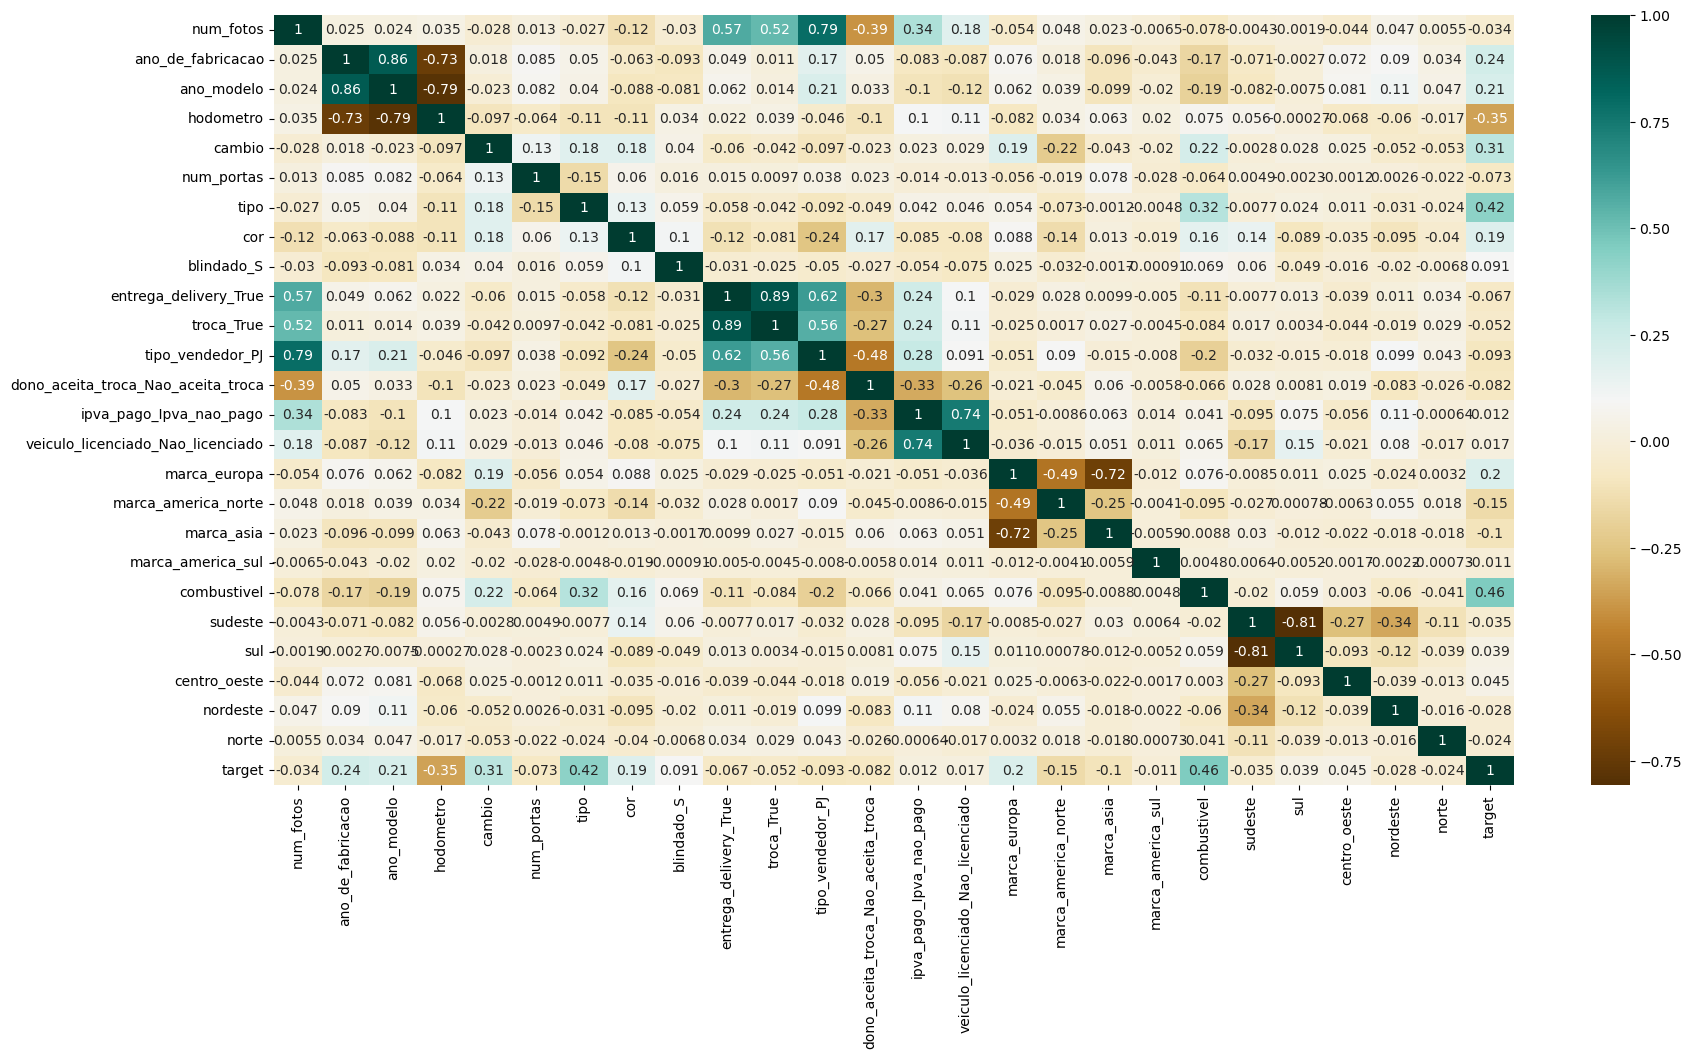

<IPython.core.display.Javascript object>

In [64]:
plt.figure(figsize=(20, 10))
c = X.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
c

In [65]:
## Aplicando as transformações no nosso x_test
df_Xtest = X_test

# Excluindo as variáveis com mais de 50% dos dados missing do nosso dataset
df_Xtest = df_Xtest.drop(excluded_variables, axis=1)

# Imputando valor 8 para os registros missing da variável num_fotos
df_Xtest["num_fotos"] = df_Xtest["num_fotos"].fillna(8)

# Aplicando a função fillna para inputar os valores nos dados dono_aceita_troca
df_Xtest["dono_aceita_troca"] = df_Xtest["dono_aceita_troca"].fillna("Nao_aceita_troca")

# Aplicando a função fillna para inputar os valores nos dados ipva_pago
df_Xtest["ipva_pago"] = df_Xtest["ipva_pago"].fillna("Ipva_nao_pago")

# Aplicando a função fillna para inputar os valores nos dados veiculo_licenciado
df_Xtest["veiculo_licenciado"] = df_Xtest["veiculo_licenciado"].fillna("Nao_licenciado")

# Tratando variáveis categóricas binárias com get_dummies
df_Xtest = pd.get_dummies(
    df_Xtest,
    columns=[
        "blindado",
        "entrega_delivery",
        "troca",
        "tipo_vendedor",
        "dono_aceita_troca",
        "ipva_pago",
        "veiculo_licenciado",
    ],
    drop_first=True,
)

# Tratando a variável marca
df_Xtest.loc[df_Xtest["marca"].isin(marcas_europa), "marca_europa"] = 1
df_Xtest.loc[df_Xtest["marca"].isin(marcas_america_norte), "marca_america_norte"] = 1
df_Xtest.loc[df_Xtest["marca"].isin(marcas_asiaticas), "marca_asia"] = 1
df_Xtest.loc[df_Xtest["marca"].isin(marcas_america_sul), "marca_america_sul"] = 1

# Preenchendo com valor 0 os demais valores que não foram preenchidos com 1
df_Xtest = df_Xtest.fillna(0)

# Deletando a variável 'marca'
df_Xtest = df_Xtest.drop("marca", axis=1)

# Removendo a variável 'modelo'
df_Xtest = df_Xtest.drop("modelo", axis=1)

# Tratando a variável versão
list_values_motor = []

for value in df_Xtest["versao"]:
    value = value.split(" ")[0]
    list_values_motor.append(value)

# Criando uma novo coluna chamada motor que recebe os valores da nossa lista
df_Xtest["motor"] = list_values_motor

# Criando a lista com os valores a serem substítuidos na variável motor
eletricos = ["B12P", "4S", "ELÉTRICO", "Z.E.", "EV", "BEV", "TURBO", "P8", "90"]

# Aplicando a alteração de valores na variável
df_Xtest.loc[df_Xtest["motor"].isin(eletricos), "motor"] = "2.0"

# Criando a variável combustivel também com base na variável versao
list_values_combustivel = []

for value in df_Xtest["versao"]:
    line = value.split(" ")
    if "DIESEL" in line:
        list_values_combustivel.append("DIESEL")
    elif "GASOLINA" in line:
        list_values_combustivel.append("GASOLINA")
    elif "FLEX" in line:
        list_values_combustivel.append("FLEX")
    elif "ACTIVEFLEX" in line:
        list_values_combustivel.append("ACTIVEFLEX")
    elif "FLEXONE" in line:
        list_values_combustivel.append("FLEXONE")
    elif "FLEXSTART" in line:
        list_values_combustivel.append("FLEXSTART")
    elif "HI-FLEX" in line:
        list_values_combustivel.append("HI-FLEX")
    elif "iFLEX" in line:
        list_values_combustivel.append("iFLEX")
    elif "HYBRID" in line:
        list_values_combustivel.append("HYBRID")
    elif "E-HYBRID" in line:
        list_values_combustivel.append("E-HYBRID")
    elif "HÍBRIDO" in line:
        list_values_combustivel.append("HÍBRIDO")
    elif "TOTALFLEX" in line:
        list_values_combustivel.append("TOTALFLEX")
    elif "ELÉTRICO" in line:
        list_values_combustivel.append("ELÉTRICO")
    else:
        list_values_combustivel.append("sem_informacao")

df_Xtest["combustivel"] = list_values_combustivel

# Agrupando combustiveis em Flex e Hibrido
df_Xtest.loc[df_Xtest["combustivel"].isin(Flex), "combustivel"] = "FLEX"
df_Xtest.loc[df_Xtest["combustivel"].isin(Hibrido), "combustivel"] = "HIBRIDO"

# Aplicando a transformação numérica de acordo com o preço médio dos carros para cada combústivel
df_Xtest.loc[df_Xtest["combustivel"] == "FLEX", "combustivel"] = 1
df_Xtest.loc[df_Xtest["combustivel"] == "GASOLINA", "combustivel"] = 2
df_Xtest.loc[df_Xtest["combustivel"] == "DIESEL", "combustivel"] = 3
df_Xtest.loc[df_Xtest["combustivel"] == "ELÉTRICO", "combustivel"] = 4
df_Xtest.loc[df_Xtest["combustivel"] == "HIBRIDO", "combustivel"] = 5

# Tratando a variável cambio
df_Xtest.loc[df_Xtest["cambio"] == "Automática Sequencial", "cambio"] = 1
df_Xtest.loc[df_Xtest["cambio"] == "Manual", "cambio"] = 2
df_Xtest.loc[df_Xtest["cambio"] == "Semi-automática", "cambio"] = 3
df_Xtest.loc[df_Xtest["cambio"] == "CVT", "cambio"] = 4
df_Xtest.loc[df_Xtest["cambio"] == "Automatizada", "cambio"] = 5
df_Xtest.loc[df_Xtest["cambio"] == "Automática", "cambio"] = 6
df_Xtest.loc[df_Xtest["cambio"] == "Automatizada DCT", "cambio"] = 7

# Tratando a variável tipo
df_Xtest.loc[df_Xtest["tipo"] == "Minivan", "tipo"] = 1
df_Xtest.loc[df_Xtest["tipo"] == "Hatchback", "tipo"] = 2
df_Xtest.loc[df_Xtest["tipo"] == "Perua/SW", "tipo"] = 3
df_Xtest.loc[df_Xtest["tipo"] == "Sedã", "tipo"] = 4
df_Xtest.loc[df_Xtest["tipo"] == "Picape", "tipo"] = 5
df_Xtest.loc[df_Xtest["tipo"] == "Utilitário esportivo", "tipo"] = 6
df_Xtest.loc[df_Xtest["tipo"] == "Cupê", "tipo"] = 7

# Tratando a variável cor
df_Xtest.loc[df_Xtest["cor"] == "Vermelho", "cor"] = 1
df_Xtest.loc[df_Xtest["cor"] == "Verde", "cor"] = 2
df_Xtest.loc[df_Xtest["cor"] == "Dourado", "cor"] = 3
df_Xtest.loc[df_Xtest["cor"] == "Prata", "cor"] = 4
df_Xtest.loc[df_Xtest["cor"] == "Branco", "cor"] = 5
df_Xtest.loc[df_Xtest["cor"] == "Preto", "cor"] = 6
df_Xtest.loc[df_Xtest["cor"] == "Cinza", "cor"] = 7

# Tratando a variável estado_vendedor
df_Xtest.loc[df_Xtest["estado_vendedor"].isin(Sudeste), "sudeste"] = 1
df_Xtest.loc[df_Xtest["estado_vendedor"].isin(Sul), "sul"] = 1
df_Xtest.loc[df_Xtest["estado_vendedor"].isin(Centro_Oeste), "centro_oeste"] = 1
df_Xtest.loc[df_Xtest["estado_vendedor"].isin(Nordeste), "nordeste"] = 1
df_Xtest.loc[df_Xtest["estado_vendedor"].isin(Norte), "norte"] = 1

# Preenchendo os valores missing das colunas
df_Xtest = df_Xtest.fillna(0)

# Deletando a variável estado_vendedor
df_Xtest = df_Xtest.drop("estado_vendedor", axis=1)

# Tratando a variável anunciante
df_Xtest.loc[df_Xtest["anunciante"] == "Pessoa Física", "anunciante"] = 4
df_Xtest.loc[df_Xtest["anunciante"] == "Concessionária", "anunciante"] = 3
df_Xtest.loc[df_Xtest["anunciante"] == "Loja", "anunciante"] = 2
df_Xtest.loc[
    df_Xtest["anunciante"] == "Acessórios e serviços para autos", "anunciante"
] = 1

# Excluindo as variáveis versao e cidade_vendedor
df_Xtest = df_Xtest.drop(["versao", "cidade_vendedor"], axis=1)

# Padronizando os dados
df_Xtest[
    ["ano_de_fabricacao", "ano_modelo", "hodometro"]
] = StandardScaler().fit_transform(
    df_Xtest[["ano_de_fabricacao", "ano_modelo", "hodometro"]]
)

<IPython.core.display.Javascript object>

## Construindo o Melhor Modelo de Predição

A primeira versão do modelo será com todas a variáveis, ele será o nosso modelo base. Depois iremos criar outras versões com alterações, e sempre comparando o resultado com a nossa versão base.

In [66]:
# Criando as variáveis X_train e X_test para serem utilizadas na criação dos modelos
X_train = df_Xtrain
X_test = df_Xtest

<IPython.core.display.Javascript object>

### Regressão Linear

In [67]:
# Construção do modelo de Regressão Linear
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)
y_pred = modelo_lr.predict(X_test)
r2_score_1, mae_1, mse_1 = (
    r2_score(y_test, y_pred),
    mean_absolute_error(y_test, y_pred),
    np.sqrt(mean_squared_error(y_test, y_pred)),
)
score_1 = modelo_lr.score(X_train, y_train)

<IPython.core.display.Javascript object>

### Descision Tree

In [68]:
# Construção do modelo de Decision Tree
modelo_dt = DecisionTreeRegressor()
modelo_dt.fit(X_train, y_train)
y_pred2 = modelo_dt.predict(X_test)
r2_score_2, mae_2, mse_2 = (
    r2_score(y_test, y_pred2),
    mean_absolute_error(y_test, y_pred2),
    np.sqrt(mean_squared_error(y_test, y_pred2)),
)
score_2 = modelo_dt.score(X_train, y_train)

<IPython.core.display.Javascript object>

### Random Forest Regressor

In [69]:
# Construção do modelo Random Forest Regressor
modelo_rd = RandomForestRegressor()
modelo_rd.fit(X_train, y_train)
y_pred3 = modelo_rd.predict(X_test)
r2_score_3, mae_3, mse_3 = (
    r2_score(y_test, y_pred3),
    mean_absolute_error(y_test, y_pred3),
    np.sqrt(mean_squared_error(y_test, y_pred3)),
)
score_3 = modelo_rd.score(X_train, y_train)

<IPython.core.display.Javascript object>

### Construindo tabela com os resultados dos modelos

In [70]:
resultados = pd.DataFrame(
    {
        "Modelos": ["Regressao_Linear", "Decision_Tree", "Random_Forest"],
        "r2_score": [r2_score_1, r2_score_2, r2_score_3],
        "mae": [mae_1, mae_2, mae_3],
        "mse": [mse_1, mse_2, mse_3],
        "score": [score_1, score_2, score_3],
    }
)
resultados

,Modelos,r2_score,mae,mse,score
0,Regressao_Linear,0.00,59291.95,80502.40,0.00
1,Decision_Tree,0.38,40348.03,63368.93,1.00
2,Random_Forest,0.70,29760.31,43924.51,0.96


<IPython.core.display.Javascript object>

- Os resultados para a Regressão Linear são bem fracos. 
- Os resultados do modelo da Decision Tree são um pouco melhores, mas como temos valor 1.0 para o score, e os outros resultados não são tão bons, este modelo pode estar sofrendo de overfiting. 
- Os resultados da Ranfom Forest são bem melhores e coerentes. Este será o nosso modelo.

Vamos tentar otimizar ainda o nosso modelo utilizando apenas as variáveis que possuem um maior valor de correlação conforme o heatmap desenvolvido acima. 

In [71]:
X_train_rf = df_Xtrain[
    ["ano_de_fabricacao", "ano_modelo", "hodometro", "cambio", "tipo", "combustivel"]
]
X_test_rf = df_Xtest[
    ["ano_de_fabricacao", "ano_modelo", "hodometro", "cambio", "tipo", "combustivel"]
]

modelo_rd2 = RandomForestRegressor()
modelo_rd2.fit(X_train_rf, y_train)
y_pred4 = modelo_rd2.predict(X_test_rf)
r2_score_4, mae_4, mse_4 = (
    r2_score(y_test, y_pred4),
    mean_absolute_error(y_test, y_pred4),
    np.sqrt(mean_squared_error(y_test, y_pred4)),
)
score_4 = modelo_rd2.score(X_train_rf, y_train)

<IPython.core.display.Javascript object>

In [72]:
resultados = pd.DataFrame(
    {
        "Modelos": [
            "Regressao_Linear",
            "Decision_Tree",
            "Random_Forest",
            "Random_Forest_Corr",
        ],
        "r2_score": [r2_score_1, r2_score_2, r2_score_3, r2_score_4],
        "mae": [mae_1, mae_2, mae_3, mae_4],
        "mse": [mse_1, mse_2, mse_3, mse_4],
        "score": [score_1, score_2, score_3, score_4],
    }
)
resultados

,Modelos,r2_score,mae,mse,score
0,Regressao_Linear,0.00,59291.95,80502.40,0.00
1,Decision_Tree,0.38,40348.03,63368.93,1.00
2,Random_Forest,0.70,29760.31,43924.51,0.96
3,Random_Forest_Corr,0.49,39657.13,57239.02,0.93


<IPython.core.display.Javascript object>

Utilizando as variáveis que possuem maior correlação com a nossa variável target, o segundo modelo de Random Forest apresentou desempenhou inferior. Então ficaremos com o nosso terceiro modelo. 

#### Modelo Escolhido: Random_Forest - modelo_rd

## Aplicando o nosso Modelo no Daraframe de Teste 

In [73]:
df_test = pd.read_csv("cars_test.csv", encoding="utf=16", sep="\t")
df_test.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,blindado,cor,tipo_vendedor,cidade_vendedor,estado_vendedor,anunciante,entrega_delivery,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado
0,13518783164498355150900635905895481162,8.00,NISSAN,VERSA,1.6 16V FLEXSTART V-DRIVE MANUAL,2021,2021.00,20258.00,Manual,4,Hatchback,N,Branco,PF,Rio de Janeiro,São Paulo (SP),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,Garantia de fábrica,NaN,NaN
1,299896161723793383246777788797566040330,18.00,FIAT,STRADA,1.4 MPI WORKING CS 8V FLEX 2P MANUAL,2021,2021.00,53045.00,Manual,2,Picape,N,Branco,PJ,Palmas,Amazonas (AM),Loja,False,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN
2,316180649972302128246133616457018378621,8.00,AUDI,Q5,2.0 TFSI GASOLINA BLACK S TRONIC,2018,2019.00,32486.00,Automática,4,Utilitário esportivo,N,Branco,PF,Goiânia,Goiás (GO),Pessoa Física,False,False,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN
3,222527157104148385909188217274642813298,16.00,CHEVROLET,CRUZE,1.4 TURBO LT 16V FLEX 4P AUTOMÁTICO,2019,2020.00,24937.00,Automática,4,Sedã,N,Cinza,PJ,Presidente Prudente,São Paulo (SP),Loja,False,False,False,Aceita troca,Único dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN
4,160460343059850745858546502614838368036,8.00,FORD,ECOSPORT,1.5 TI-VCT FLEX SE AUTOMÁTICO,2019,2019.00,62074.00,Automática,4,Sedã,N,Branco,PJ,Limeira,São Paulo (SP),Loja,False,False,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN


<IPython.core.display.Javascript object>

## Aplicando as Transformações no Dataset

In [74]:
# Excluindo as variáveis com mais de 50% dos dados missing do nosso dataset
df_test = df_test.drop(excluded_variables, axis=1)

# Imputando valor 8 para os registros missing da variável num_fotos
df_test["num_fotos"] = df_test["num_fotos"].fillna(8)

# Aplicando a função fillna para inputar os valores nos dados dono_aceita_troca
df_test["dono_aceita_troca"] = df_test["dono_aceita_troca"].fillna("Nao_aceita_troca")

# Aplicando a função fillna para inputar os valores nos dados ipva_pago
df_test["ipva_pago"] = df_test["ipva_pago"].fillna("Ipva_nao_pago")

# Aplicando a função fillna para inputar os valores nos dados veiculo_licenciado
df_test["veiculo_licenciado"] = df_test["veiculo_licenciado"].fillna("Nao_licenciado")

# Tratando variáveis categóricas binárias com get_dummies
df_test = pd.get_dummies(
    df_test,
    columns=[
        "blindado",
        "entrega_delivery",
        "troca",
        "tipo_vendedor",
        "dono_aceita_troca",
        "ipva_pago",
        "veiculo_licenciado",
    ],
    drop_first=True,
)

# Tratando a variável marca
df_test.loc[df_test["marca"].isin(marcas_europa), "marca_europa"] = 1
df_test.loc[df_test["marca"].isin(marcas_america_norte), "marca_america_norte"] = 1
df_test.loc[df_test["marca"].isin(marcas_asiaticas), "marca_asia"] = 1
df_test.loc[df_test["marca"].isin(marcas_america_sul), "marca_america_sul"] = 1

# Preenchendo com valor 0 os demais valores que não foram preenchidos com 1
df_test = df_test.fillna(0)

# Deletando a variável 'marca'
df_test = df_test.drop("marca", axis=1)

# Removendo a variável 'modelo'
df_test = df_test.drop("modelo", axis=1)

# Tratando a variável versão
list_values_motor = []

for value in df_test["versao"]:
    value = value.split(" ")[0]
    list_values_motor.append(value)

# Criando uma novo coluna chamada motor que recebe os valores da nossa lista
df_test["motor"] = list_values_motor

# Criando a lista com os valores a serem substítuidos na variável motor
eletricos = ["B12P", "4S", "ELÉTRICO", "Z.E.", "EV", "BEV", "TURBO", "P8", "90"]

# Aplicando a alteração de valores na variável
df_test.loc[df_test["motor"].isin(eletricos), "motor"] = "2.0"

# Criando a variável combustivel também com base na variável versao
list_values_combustivel = []

for value in df_test["versao"]:
    line = value.split(" ")
    if "DIESEL" in line:
        list_values_combustivel.append("DIESEL")
    elif "GASOLINA" in line:
        list_values_combustivel.append("GASOLINA")
    elif "FLEX" in line:
        list_values_combustivel.append("FLEX")
    elif "ACTIVEFLEX" in line:
        list_values_combustivel.append("ACTIVEFLEX")
    elif "FLEXONE" in line:
        list_values_combustivel.append("FLEXONE")
    elif "FLEXSTART" in line:
        list_values_combustivel.append("FLEXSTART")
    elif "HI-FLEX" in line:
        list_values_combustivel.append("HI-FLEX")
    elif "iFLEX" in line:
        list_values_combustivel.append("iFLEX")
    elif "HYBRID" in line:
        list_values_combustivel.append("HYBRID")
    elif "E-HYBRID" in line:
        list_values_combustivel.append("E-HYBRID")
    elif "HÍBRIDO" in line:
        list_values_combustivel.append("HÍBRIDO")
    elif "TOTALFLEX" in line:
        list_values_combustivel.append("TOTALFLEX")
    elif "ELÉTRICO" in line:
        list_values_combustivel.append("ELÉTRICO")
    else:
        list_values_combustivel.append("sem_informacao")

df_test["combustivel"] = list_values_combustivel

# Agrupando combustiveis em Flex e Hibrido
df_test.loc[df_test["combustivel"].isin(Flex), "combustivel"] = "FLEX"
df_test.loc[df_test["combustivel"].isin(Hibrido), "combustivel"] = "HIBRIDO"

# Aplicando a transformação numérica de acordo com o preço médio dos carros para cada combústivel
df_test.loc[df_test["combustivel"] == "FLEX", "combustivel"] = 1
df_test.loc[df_test["combustivel"] == "GASOLINA", "combustivel"] = 2
df_test.loc[df_test["combustivel"] == "DIESEL", "combustivel"] = 3
df_test.loc[df_test["combustivel"] == "ELÉTRICO", "combustivel"] = 4
df_test.loc[df_test["combustivel"] == "HIBRIDO", "combustivel"] = 5

# Tratando a variável cambio
df_test.loc[df_test["cambio"] == "Automática Sequencial", "cambio"] = 1
df_test.loc[df_test["cambio"] == "Manual", "cambio"] = 2
df_test.loc[df_test["cambio"] == "Semi-automática", "cambio"] = 3
df_test.loc[df_test["cambio"] == "CVT", "cambio"] = 4
df_test.loc[df_test["cambio"] == "Automatizada", "cambio"] = 5
df_test.loc[df_test["cambio"] == "Automática", "cambio"] = 6
df_test.loc[df_test["cambio"] == "Automatizada DCT", "cambio"] = 7

# Tratando a variável tipo

df_test.loc[df_test["tipo"] == "Minivan", "tipo"] = 1
df_test.loc[df_test["tipo"] == "Hatchback", "tipo"] = 2
df_test.loc[df_test["tipo"] == "Perua/SW", "tipo"] = 3
df_test.loc[df_test["tipo"] == "Sedã", "tipo"] = 4
df_test.loc[df_test["tipo"] == "Picape", "tipo"] = 5
df_test.loc[df_test["tipo"] == "Utilitário esportivo", "tipo"] = 6
df_test.loc[df_test["tipo"] == "Cupê", "tipo"] = 7
df_test.loc[df_test["tipo"] == "Conversível", "tipo"] = 7


# Tratando a variável cor
df_test.loc[df_test["cor"] == "Vermelho", "cor"] = 1
df_test.loc[df_test["cor"] == "Verde", "cor"] = 2
df_test.loc[df_test["cor"] == "Azul", "cor"] = 2
df_test.loc[df_test["cor"] == "Dourado", "cor"] = 3
df_test.loc[df_test["cor"] == "Prata", "cor"] = 4
df_test.loc[df_test["cor"] == "Branco", "cor"] = 5
df_test.loc[df_test["cor"] == "Preto", "cor"] = 6
df_test.loc[df_test["cor"] == "Cinza", "cor"] = 7

# Tratando a variável estado_vendedor
df_test.loc[df_test["estado_vendedor"].isin(Sudeste), "sudeste"] = 1
df_test.loc[df_test["estado_vendedor"].isin(Sul), "sul"] = 1
df_test.loc[df_test["estado_vendedor"].isin(Centro_Oeste), "centro_oeste"] = 1
df_test.loc[df_test["estado_vendedor"].isin(Nordeste), "nordeste"] = 1
df_test.loc[df_test["estado_vendedor"].isin(Norte), "norte"] = 1

# Preenchendo os valores missing das colunas
df_test = df_test.fillna(0)

# Deletando a variável estado_vendedor
df_test = df_test.drop("estado_vendedor", axis=1)

# Tratando a variável anunciante
df_test.loc[df_test["anunciante"] == "Pessoa Física", "anunciante"] = 4
df_test.loc[df_test["anunciante"] == "Concessionária", "anunciante"] = 3
df_test.loc[df_test["anunciante"] == "Loja", "anunciante"] = 2
df_test.loc[
    df_test["anunciante"] == "Acessórios e serviços para autos", "anunciante"
] = 1

# Excluindo as variáveis versao e cidade_vendedor
df_test = df_test.drop(["versao", "cidade_vendedor"], axis=1)

# Padronizando os dados
df_test[
    ["ano_de_fabricacao", "ano_modelo", "hodometro"]
] = StandardScaler().fit_transform(
    df_test[["ano_de_fabricacao", "ano_modelo", "hodometro"]]
)

<IPython.core.display.Javascript object>

In [75]:
# Fazendo a previsão
results = modelo_rd.predict(df_test)
results

array([ 60795.82103942,  67739.5968445 , 282971.42922258, ...,
        87085.91213396, 142059.51848597, 310754.39308385])

<IPython.core.display.Javascript object>

In [76]:
# Criando DataFrame com a previsão
predicao = pd.DataFrame(
    {"predicao": results}, index=pd.RangeIndex(start=1, stop=9863, name="index")
)

<IPython.core.display.Javascript object>

In [77]:
predicao.head()

,predicao
index,
1,60795.82
2,67739.60
3,282971.43
4,108916.24
5,104807.27


<IPython.core.display.Javascript object>

## Salvando DataFrame em um aquivo Excel

In [78]:
# Criando um arquivo csv com a nossa previsão
predicao.to_csv("predicted.csv")

<IPython.core.display.Javascript object>

# Explicação da Construção do Modelo

### Quais variáveis e/ou suas transformações você utilizou e por quê?

A base de dados incial era composta por 29 variáveis, sendo 28 variáveis <i>features</i> e uma variável <i>target</i>.  

Durante o pré-processamento,foi adotado por critério a exclusão das variáveis que possuíam mais de 50% de seus registros <i>missings</i>. Então nesta etapa as variáveis 'veiculo_único_dono', 'revisoes_concessionaria', 'garantia_de_fábrica', 'revisoes_dentro_agenda', 'veiculo_alienado' foram excluídas no nosso <i>dataset</i>. A variável 'elegivel_revisao' foi excluída na mesma etapa, pois todos os seus valores eram <i>False</i>, não contribuindo para um melhor resultado do nosso modelo. Ao final desta etapa nosso conjunto de dados para modelagem estava com 22 variáveis sem incluir a variável target. As demais variáveis que tiveram tratamento para variáveis <i>missings</i> foram:

- num_fotos: 0.6% de dados <i>missing</i>. Utilizamos as medidas de tendência central mediana e moda para seu preenchimento.

- dono_aceita_troca: 25.90% de dados <i>missing</i>. Como quase 75% dos dados estavam preenchidos com o registro "Aceita troca", preenchi os valores <i>missing</i> com a variável "Não_Aceita_troca", entendendo que é comum que existam pessoas que no momento da venda de seu carro não aceitem outro veículo em troca. Assim tornei esta variável binária.

- ipva_pago: 33.55% de dados <i>missing</i>. Como quase 67% dos dados estavam preenchidos com o registro "Ipva pago", e entendo a natureza da variável, que pode ser paga em diferentes meses do ano a depender da política de cobrança de cada estado, conclui que os demais registros poderiam ser preenchidos com o registro "Ipva Não Pago". Tornando esta variável binária também.

- veiculo_licenciado: 46.23% de dados <i>missing</i>. Mesmo critério utilizado na variável "ipva_pago".

Depois do concluído o tratamento dedados <i>missing</i>, fizemos o tratamento nas variáveis categóricas. Utilizamos a função **get_dummies** do pandas para para aplicarmos nas variáveis binárias as transformando em valores numéricos (0 e 1). Estas variáveis foram: 'blindado', 'entrega_delivery', 'troca', 'tipo_vendedor', 'dono_aceita_troca', 'ipva_pago' e 'veiculo_licenciado'.

Após esta etapa, as demais variáveis categóricas receberam diferentes tratamentos, sempre de acordo com as características específicas de cada uma delas:

- marca: foi criado novas variáveis de acordo com o continente de cada marca. Por não haver uma ordenação ou rankeamento entre os continentes, todos receberam valor 1 como peso.

- modelo: como se tratava de 457 valores únicos, e fornecendo apenas o nome de cada carro (o que parecia gerar pouca influência na variável target), esta variável acabou sendo excluída do conjunto de dados.

- versão: por se tratar de registros "string" extensos, acabei extraindo apenas duas informações que pareciam mais possíveis de haver uma correlação com a nossa variável target. Assim foi criada a variável "motor" contendo a variável das cilindradas de cada registro e a variável "combustivel" contendo a informação de qual combustível é utilizado em cada carro.

- cidade_vendedor: como se tratava de 502 valores únicos, e entendendo que a cidade de onde é o carro muito pouco deve influenciar em seu preço, esta variável também foi excluída do nosso conjunto de dados. 

- estado_vendedor: os estados foram divididos em 5 novas variáveis, cada uma delas representando uma região do Brasil. Aqui foi concluído que não existia uma ordenação entre as regiões, então todas receberam 1 como peso. 

- cambio, tipo, cor e anunciante: ao avaliar o preço média dos carros de acordo com cada registro destas variáveis, foi possível concluir uma diferença significativa de valores, então para estas variáveis adotamos a transformação numérica de forma ordenada.

**É impotante salientar que utilizamos a variável "id" para o processamento dos dados, mas a retiramos do conjunto de dados utilizado para modelagem, pois ela não possui característica técnica, ou seja, não influência nada na nossa variável target**

Desta forma nosso conjunto de dados final utilizado para a modelagem contou com 27 variáveis <i>features</i>, sendo elas:

- num_fotos
- ano_de_fabricacao
- ano_modelo
- hodometro
- cambio
- num_portas
- tipo
- cor
- anunciante
- blindado_S
- entrega_delivery_True
- troca_True
- tipo_vendedor_PJ
- dono_aceita_troca_Nao_aceita_troca
- ipva_pago_Ipva_nao_pago
- veiculo_licenciado_Nao_licenciado
- marca_europa
- marca_america_norte
- marca_asia
- marca_america_sul
- motor
- combustivel
- sudeste
- sul
- centro_oeste
- nordeste
- norte

### Qual tipo de problema estamos resolvendo (regressão, classificação)?

Um problema de Regressão.

### Qual modelo melhor se aproxima dos dados e quais seus prós e contras?

O modelo que apresentou melhores resultados foi o **Random Forest Regressor**.
No segundo modelo, utilizamos o algorítmo Decision Tree, que cria uma estrutura de nós parecida com um fluxograma, onde ele vai verificando a condição de cada nó, caso a condição seja atendida ele segue por um fluxo, caso contrário, ele segue por outro fluxo.  
O Random Forest Regressor é um conjunto de Decision Tree, ou seja, ele se utiliza de várias árvores para encontrar o melhor resultado. Por isso ele é chamado de **método enseble**, pois ele se utiliza de mais de um modelo para se obter um único resultado.

- Vantagens do Random Forest Regressor: alto nível de acurácia, lida bem com grandes datasets e com grande número de atributos.
- Desvantagens do Random Forest Regressor: maior tempo de processamento computacional e compreensão um pouco mais complexa em comparação a modelos mais simples, como a Regressão Linear ou Decision Tree.

### Qual medida de performance do modelo foi escolhida e por quê?

Foi utilizada as seguintes medidas de performance para a escolha do melhor modelo:

- r2: varia de 0 a 1. Quanto maior for o seu valor, mais explicativo é o modelo em relação aos dados previstos.
- Erro médio absoluto: mede a diferença entre o valor real e o valor predito. Quanto menor melhor.
- Erro quadrático médio: ela também mede a diferença entre o valor real e o valor predito, mas esta diferença é elevada ao quadrado, penalizando valores que sejam muito diferentes entre o previsto e o real. Quando menor seu valor, melhor é.
- Acurácia: é a média global do acerto do modelo. Quanto mais alto for, melhor é. 

Como pode haver questões interpretativas para cada uma das medidas de performance, optei por utilizar estas quatro medidas, dando mais segurança na escolha do melhor modelo. Em todas elas o modelo que obteve o melhor resultado foi a **Random Forest Regressor**.


